In [8]:
import auxiliarfunctions as af

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import knn.knn as neighbors
import knn.knn_modified as neighbors_modified

In [9]:
# create a empty list
datasets = []
datatraintest = []

# push the fetch_and_prepare_dataset(dataset_id) with id 37 and 163
datasets.append(af.fetch_and_prepare_dataset(37))
datasets.append(af.fetch_and_prepare_dataset(163))

# split the datasets into train and test
datatraintest.append(train_test_split(datasets[0][0], datasets[0][1], test_size=0.2))
datatraintest.append(train_test_split(datasets[1][0], datasets[1][1], test_size=0.2))

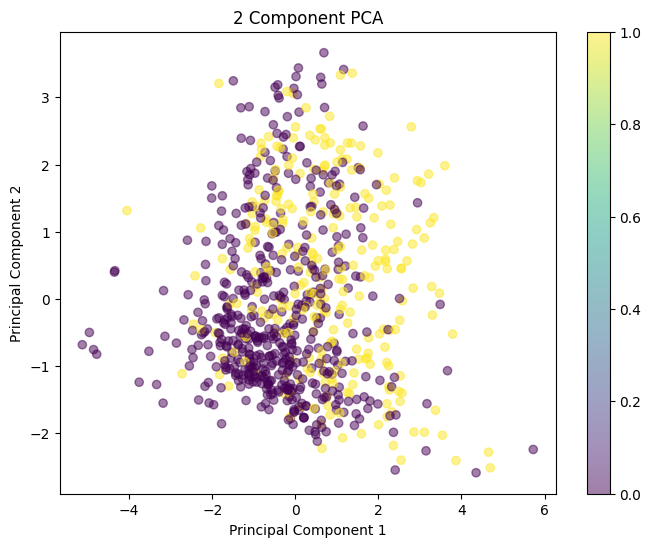

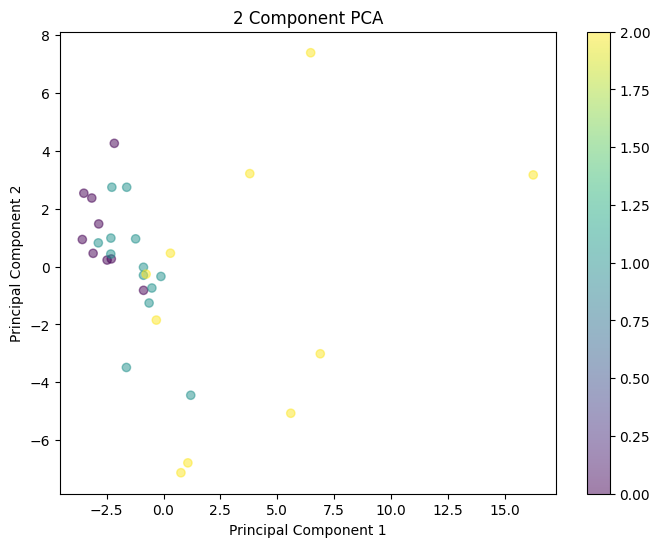

In [10]:
# draw the plot using af.apply_pca_and_plot_with_encoding(X, y)
af.apply_pca_and_plot_with_encoding(datasets[0][0], datasets[0][1])
af.apply_pca_and_plot_with_encoding(datasets[1][0], datasets[1][1])

In [11]:
# list of classifiers
classifiers = [neighbors.KNNClassifier(k=5), neighbors_modified.KNNClassifier(k=5)]
classifiers_names = ['KNN', 'KNN Modified']

In [12]:
def classify_and_evaluate(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [13]:
# iterate over the classifiers
for i in range(len(datasets)):
    for classifier, classifier_name in zip(classifiers, classifiers_names):
        X_train, X_test, y_train, y_test = datatraintest[i]
        accuracy = classify_and_evaluate(classifier, X_train, X_test, y_train, y_test)
        print(f'Accuracy for dataset {i} with classifier {classifier_name}: {accuracy}')

Accuracy for dataset 0 with classifier KNN: 0.6818181818181818
Accuracy for dataset 0 with classifier KNN Modified: 0.7207792207792207
Accuracy for dataset 1 with classifier KNN: 0.14285714285714285
Accuracy for dataset 1 with classifier KNN Modified: 0.2857142857142857
